In [1]:
from importlib.metadata import version

import tiktoken
import torch 

print("torch version:", version("torch"))
print("tiktoken version:", version("tiktoken"))

torch version: 2.1.2
tiktoken version: 0.6.0


In [2]:
with open('the-verdict.txt', 'r', encoding='utf-8') as f:
    raw_text = f.read()

In [3]:
print('no of characters:', len(raw_text))
print(raw_text[55:99])

no of characters: 20479
--though a good fellow enough--so it was no 


In [5]:
#Sample text for tokenizer

import re 
text = "hello, world. This, is a test."
result = re.split(r'(\s)', text)

print(result)

['hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [10]:
result = re.split(r'([,.]|\s)', text)
print(result)

['hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [14]:
result = [items for items in result if items.strip()]
print(result)

['hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [15]:
text = 'Hello, world. Is this-- a test?'

result = re.split(r'([,.;:"()\'_!?]|--|\s)', text)
result = [item for item in result if item.split()]
print(result)

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [6]:
preprocessed = re.split(r'([,.?:;"()\'_!]|--|\s)', raw_text)
preprocessed = [item for item in preprocessed if item.split()]
print(preprocessed[:30])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']


In [7]:
print(len(preprocessed))

4690


### Convert tokens into token IDs

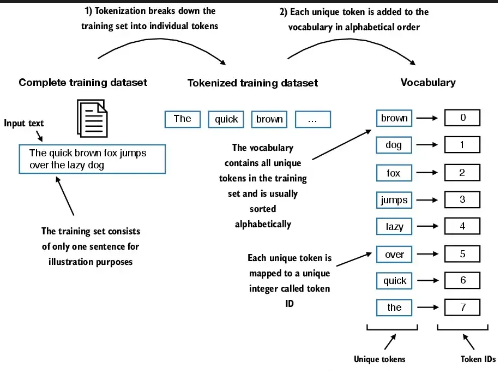

In [8]:
#from the preprocessed text, we can now build a vocabulary that consists of all the unique tokens

all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(vocab_size)

1130


In [9]:
vocab = {token:integer for integer, token in enumerate(all_words)}

In [10]:
for i, item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)
('At', 18)
('Be', 19)
('Begin', 20)
('Burlington', 21)
('But', 22)
('By', 23)
('Carlo', 24)
('Chicago', 25)
('Claude', 26)
('Come', 27)
('Croft', 28)
('Destroyed', 29)
('Devonshire', 30)
('Don', 31)
('Dubarry', 32)
('Emperors', 33)
('Florence', 34)
('For', 35)
('Gallery', 36)
('Gideon', 37)
('Gisburn', 38)
('Gisburns', 39)
('Grafton', 40)
('Greek', 41)
('Grindle', 42)
('Grindles', 43)
('HAD', 44)
('Had', 45)
('Hang', 46)
('Has', 47)
('He', 48)
('Her', 49)
('Hermia', 50)


### Sample text - Tokenizing - Vocab - Token ID

In [ ]:
class SimpleTokenizerV1:

    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = {i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [ 
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text
         
